In [1]:
import pandas as pd
import numpy as np

path = "data/winequality-red1.csv"
data = pd.read_csv(path, sep=';')
data.head()
#data.isnull().any()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


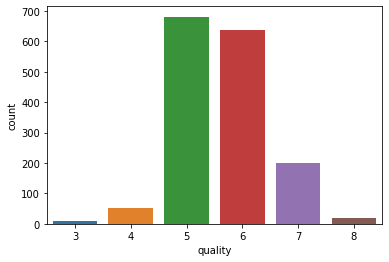

In [2]:
import seaborn as sns
ax = sns.countplot(data['quality'], label = "Count")
#v1, v2, v3, v4, v5, v6 = data['quality'].value_counts()

In [3]:
x = data.iloc[:,0:11].values
y = data.iloc[:,11:12].values

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x[0:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611]])

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y[0:5]

/home/nikhere/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,Y,test_size=0.15, random_state = 0)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=500, batch_size=32)

Train on 1359 samples, validate on 240 samples
Epoch 1/500
1359/1359 [==============================] - 1s 861us/sample - loss: 1.8456 - accuracy: 0.1994 - val_loss: 1.7067 - val_accuracy: 0.3750
Epoch 2/500
1359/1359 [==============================] - 0s 188us/sample - loss: 1.6349 - accuracy: 0.4702 - val_loss: 1.5352 - val_accuracy: 0.5667
Epoch 3/500
1359/1359 [==============================] - 0s 235us/sample - loss: 1.4753 - accuracy: 0.5099 - val_loss: 1.3653 - val_accuracy: 0.6000
Epoch 4/500
1359/1359 [==============================] - 0s 236us/sample - loss: 1.3332 - accuracy: 0.5291 - val_loss: 1.2339 - val_accuracy: 0.5917
Epoch 5/500
1359/1359 [==============================] - 0s 181us/sample - loss: 1.2310 - accuracy: 0.5291 - val_loss: 1.1560 - val_accuracy: 0.5958
Epoch 6/500
1359/1359 [==============================] - 0s 216us/sample - loss: 1.1668 - accuracy: 0.5357 - val_loss: 1.1091 - val_accuracy: 0.6083
Epoch 7/500
1359/1359 [==============================] - 0s

1359/1359 [==============================] - 0s 221us/sample - loss: 0.8441 - accuracy: 0.6512 - val_loss: 0.9738 - val_accuracy: 0.5750
Epoch 56/500
1359/1359 [==============================] - 0s 219us/sample - loss: 0.8426 - accuracy: 0.6534 - val_loss: 0.9707 - val_accuracy: 0.5750
Epoch 57/500
1359/1359 [==============================] - 0s 234us/sample - loss: 0.8405 - accuracy: 0.6549 - val_loss: 0.9719 - val_accuracy: 0.5833
Epoch 58/500
1359/1359 [==============================] - 0s 268us/sample - loss: 0.8413 - accuracy: 0.6490 - val_loss: 0.9738 - val_accuracy: 0.5667
Epoch 59/500
1359/1359 [==============================] - 0s 177us/sample - loss: 0.8373 - accuracy: 0.6527 - val_loss: 0.9691 - val_accuracy: 0.5917
Epoch 60/500
1359/1359 [==============================] - 0s 168us/sample - loss: 0.8356 - accuracy: 0.6542 - val_loss: 0.9726 - val_accuracy: 0.5875
Epoch 61/500
1359/1359 [==============================] - 0s 207us/sample - loss: 0.8349 - accuracy: 0.6556 - val

1359/1359 [==============================] - 0s 208us/sample - loss: 0.7703 - accuracy: 0.6880 - val_loss: 0.9779 - val_accuracy: 0.5917
Epoch 110/500
1359/1359 [==============================] - 0s 184us/sample - loss: 0.7698 - accuracy: 0.6917 - val_loss: 0.9879 - val_accuracy: 0.5833
Epoch 111/500
1359/1359 [==============================] - 0s 163us/sample - loss: 0.7717 - accuracy: 0.6902 - val_loss: 0.9823 - val_accuracy: 0.5792
Epoch 112/500
1359/1359 [==============================] - 0s 361us/sample - loss: 0.7653 - accuracy: 0.6939 - val_loss: 0.9814 - val_accuracy: 0.6083
Epoch 113/500
1359/1359 [==============================] - 0s 321us/sample - loss: 0.7670 - accuracy: 0.6946 - val_loss: 0.9809 - val_accuracy: 0.5875
Epoch 114/500
1359/1359 [==============================] - 0s 167us/sample - loss: 0.7667 - accuracy: 0.6880 - val_loss: 0.9784 - val_accuracy: 0.6000
Epoch 115/500
1359/1359 [==============================] - 0s 214us/sample - loss: 0.7652 - accuracy: 0.6932

1359/1359 [==============================] - 0s 302us/sample - loss: 0.7321 - accuracy: 0.7071 - val_loss: 0.9951 - val_accuracy: 0.6125
Epoch 164/500
1359/1359 [==============================] - 0s 232us/sample - loss: 0.7340 - accuracy: 0.7005 - val_loss: 1.0056 - val_accuracy: 0.6125
Epoch 165/500
1359/1359 [==============================] - 0s 226us/sample - loss: 0.7348 - accuracy: 0.7064 - val_loss: 0.9986 - val_accuracy: 0.6125
Epoch 166/500
1359/1359 [==============================] - 0s 154us/sample - loss: 0.7315 - accuracy: 0.7093 - val_loss: 1.0019 - val_accuracy: 0.6125
Epoch 167/500
1359/1359 [==============================] - 0s 150us/sample - loss: 0.7313 - accuracy: 0.7064 - val_loss: 1.0011 - val_accuracy: 0.6083
Epoch 168/500
1359/1359 [==============================] - 0s 219us/sample - loss: 0.7314 - accuracy: 0.7035 - val_loss: 1.0041 - val_accuracy: 0.6042
Epoch 169/500
1359/1359 [==============================] - 0s 143us/sample - loss: 0.7305 - accuracy: 0.7013

1359/1359 [==============================] - 0s 123us/sample - loss: 0.7085 - accuracy: 0.7152 - val_loss: 1.0200 - val_accuracy: 0.6167
Epoch 218/500
1359/1359 [==============================] - 0s 293us/sample - loss: 0.7105 - accuracy: 0.7174 - val_loss: 1.0149 - val_accuracy: 0.6292
Epoch 219/500
1359/1359 [==============================] - 0s 239us/sample - loss: 0.7092 - accuracy: 0.7152 - val_loss: 1.0183 - val_accuracy: 0.6208
Epoch 220/500
1359/1359 [==============================] - 0s 177us/sample - loss: 0.7095 - accuracy: 0.7071 - val_loss: 1.0178 - val_accuracy: 0.6167
Epoch 221/500
1359/1359 [==============================] - 0s 172us/sample - loss: 0.7146 - accuracy: 0.7145 - val_loss: 1.0117 - val_accuracy: 0.6250
Epoch 222/500
1359/1359 [==============================] - 0s 260us/sample - loss: 0.7064 - accuracy: 0.7160 - val_loss: 1.0157 - val_accuracy: 0.6333
Epoch 223/500
1359/1359 [==============================] - 0s 267us/sample - loss: 0.7068 - accuracy: 0.7167

1359/1359 [==============================] - 1s 419us/sample - loss: 0.6913 - accuracy: 0.7277 - val_loss: 1.0345 - val_accuracy: 0.6208
Epoch 272/500
1359/1359 [==============================] - 1s 385us/sample - loss: 0.6909 - accuracy: 0.7285 - val_loss: 1.0478 - val_accuracy: 0.6125
Epoch 273/500
1359/1359 [==============================] - 1s 460us/sample - loss: 0.6928 - accuracy: 0.7255 - val_loss: 1.0405 - val_accuracy: 0.6167
Epoch 274/500
1359/1359 [==============================] - 1s 389us/sample - loss: 0.6917 - accuracy: 0.7277 - val_loss: 1.0374 - val_accuracy: 0.6167
Epoch 275/500
1359/1359 [==============================] - 1s 394us/sample - loss: 0.6941 - accuracy: 0.7255 - val_loss: 1.0348 - val_accuracy: 0.6375
Epoch 276/500
1359/1359 [==============================] - 0s 364us/sample - loss: 0.6924 - accuracy: 0.7263 - val_loss: 1.0517 - val_accuracy: 0.6167
Epoch 277/500
1359/1359 [==============================] - 1s 405us/sample - loss: 0.6903 - accuracy: 0.7299

1359/1359 [==============================] - 0s 366us/sample - loss: 0.6764 - accuracy: 0.7329 - val_loss: 1.0518 - val_accuracy: 0.6167
Epoch 326/500
1359/1359 [==============================] - 0s 220us/sample - loss: 0.6787 - accuracy: 0.7329 - val_loss: 1.0619 - val_accuracy: 0.6208
Epoch 327/500
1359/1359 [==============================] - 0s 155us/sample - loss: 0.6771 - accuracy: 0.7322 - val_loss: 1.0624 - val_accuracy: 0.6208
Epoch 328/500
1359/1359 [==============================] - 0s 162us/sample - loss: 0.6781 - accuracy: 0.7307 - val_loss: 1.0709 - val_accuracy: 0.6125
Epoch 329/500
1359/1359 [==============================] - 0s 158us/sample - loss: 0.6799 - accuracy: 0.7329 - val_loss: 1.0650 - val_accuracy: 0.6250
Epoch 330/500
1359/1359 [==============================] - 0s 174us/sample - loss: 0.6788 - accuracy: 0.7292 - val_loss: 1.0621 - val_accuracy: 0.6083
Epoch 331/500
1359/1359 [==============================] - 0s 163us/sample - loss: 0.6777 - accuracy: 0.7329

1359/1359 [==============================] - 0s 200us/sample - loss: 0.6676 - accuracy: 0.7358 - val_loss: 1.0927 - val_accuracy: 0.6083
Epoch 380/500
1359/1359 [==============================] - 0s 179us/sample - loss: 0.6690 - accuracy: 0.7307 - val_loss: 1.0760 - val_accuracy: 0.6125
Epoch 381/500
1359/1359 [==============================] - 0s 190us/sample - loss: 0.6673 - accuracy: 0.7336 - val_loss: 1.0800 - val_accuracy: 0.6292
Epoch 382/500
1359/1359 [==============================] - 0s 192us/sample - loss: 0.6672 - accuracy: 0.7366 - val_loss: 1.0792 - val_accuracy: 0.6042
Epoch 383/500
1359/1359 [==============================] - 0s 216us/sample - loss: 0.6674 - accuracy: 0.7380 - val_loss: 1.0862 - val_accuracy: 0.6125
Epoch 384/500
1359/1359 [==============================] - 0s 177us/sample - loss: 0.6661 - accuracy: 0.7366 - val_loss: 1.0847 - val_accuracy: 0.6125
Epoch 385/500
1359/1359 [==============================] - 0s 193us/sample - loss: 0.6658 - accuracy: 0.7358

1359/1359 [==============================] - 0s 214us/sample - loss: 0.6560 - accuracy: 0.7388 - val_loss: 1.1157 - val_accuracy: 0.6125
Epoch 434/500
1359/1359 [==============================] - 0s 218us/sample - loss: 0.6561 - accuracy: 0.7373 - val_loss: 1.1103 - val_accuracy: 0.6333
Epoch 435/500
1359/1359 [==============================] - 0s 176us/sample - loss: 0.6544 - accuracy: 0.7447 - val_loss: 1.1159 - val_accuracy: 0.6167
Epoch 436/500
1359/1359 [==============================] - 0s 163us/sample - loss: 0.6550 - accuracy: 0.7425 - val_loss: 1.1184 - val_accuracy: 0.6083
Epoch 437/500
1359/1359 [==============================] - 0s 157us/sample - loss: 0.6554 - accuracy: 0.7417 - val_loss: 1.1161 - val_accuracy: 0.6167
Epoch 438/500
1359/1359 [==============================] - 0s 165us/sample - loss: 0.6586 - accuracy: 0.7373 - val_loss: 1.1255 - val_accuracy: 0.5958
Epoch 439/500
1359/1359 [==============================] - 0s 175us/sample - loss: 0.6541 - accuracy: 0.7403

1359/1359 [==============================] - 0s 216us/sample - loss: 0.6457 - accuracy: 0.7425 - val_loss: 1.1611 - val_accuracy: 0.6292
Epoch 488/500
1359/1359 [==============================] - 0s 174us/sample - loss: 0.6451 - accuracy: 0.7439 - val_loss: 1.1578 - val_accuracy: 0.6167
Epoch 489/500
1359/1359 [==============================] - 0s 156us/sample - loss: 0.6445 - accuracy: 0.7520 - val_loss: 1.1544 - val_accuracy: 0.6333
Epoch 490/500
1359/1359 [==============================] - 0s 154us/sample - loss: 0.6462 - accuracy: 0.7498 - val_loss: 1.1527 - val_accuracy: 0.6292
Epoch 491/500
1359/1359 [==============================] - 0s 157us/sample - loss: 0.6433 - accuracy: 0.7454 - val_loss: 1.1634 - val_accuracy: 0.6250
Epoch 492/500
1359/1359 [==============================] - 0s 172us/sample - loss: 0.6447 - accuracy: 0.7432 - val_loss: 1.1594 - val_accuracy: 0.6250
Epoch 493/500
1359/1359 [==============================] - 0s 189us/sample - loss: 0.6414 - accuracy: 0.7469

In [11]:
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         7
           2       0.68      0.74      0.71        96
           3       0.66      0.63      0.64       110
           4       0.29      0.41      0.34        22
           5       0.00      0.00      0.00         3

    accuracy                           0.62       240
   macro avg       0.27      0.30      0.28       240
weighted avg       0.60      0.62      0.61       240

[[ 0  0  1  1  0  0]
 [ 0  0  6  1  0  0]
 [ 0  1 71 21  3  0]
 [ 0  0 25 69 16  0]
 [ 0  0  1 12  9  0]
 [ 0  0  0  0  3  0]]


/home/nikhere/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


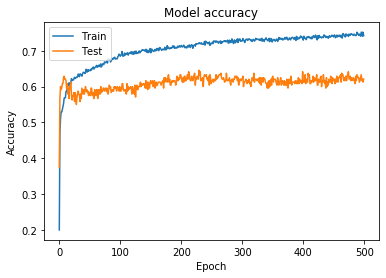

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
score = model.evaluate(x_test, y_test)

240/240 [==============================] - 0s 97us/sample - loss: 1.1594 - accuracy: 0.6208


In [15]:
model.metrics_names

['loss', 'accuracy']

In [16]:
score

[1.159417192141215, 0.62083334]

In [17]:
model.predict(x_train[0:1], batch_size=None, verbose=0, steps=None)

array([[2.1718520e-06, 6.1712526e-03, 5.8234102e-01, 4.1008759e-01,
        1.3979448e-03, 3.6862909e-12]], dtype=float32)

In [18]:
y_train[0:1]

array([[0., 0., 1., 0., 0., 0.]])